In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus :
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data_dir = 'drive/MyDrive/Colab Notebooks/CNN Img Clasf/'
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
batch[0].shape

(32, 256, 256, 3)

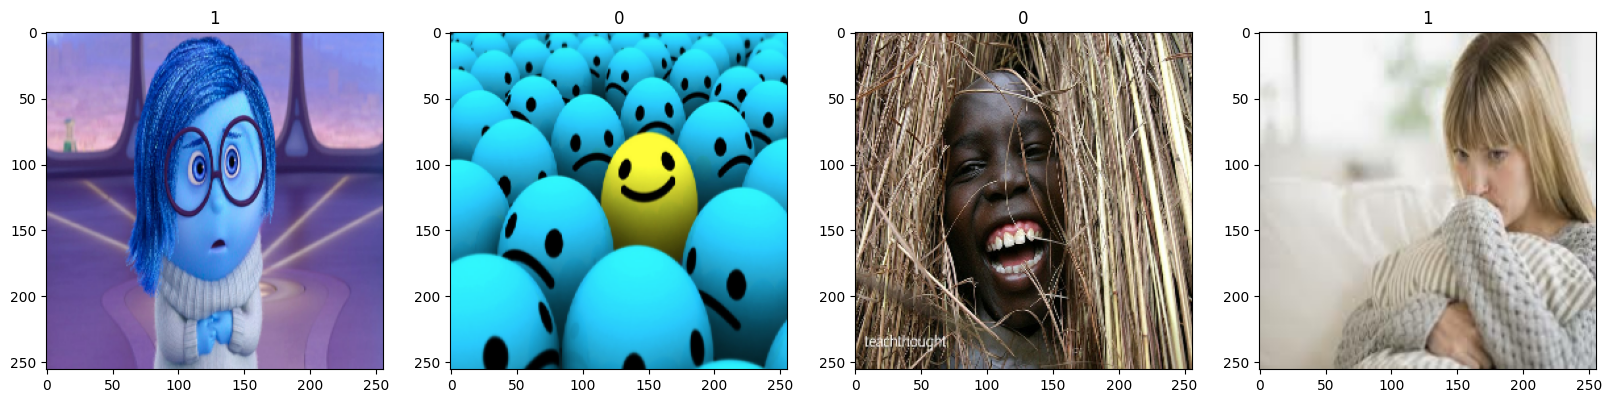

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## Preprocessing the Data

In [13]:
#scaling the data
data = data.map(lambda x,y: (x/255, y))

In [14]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

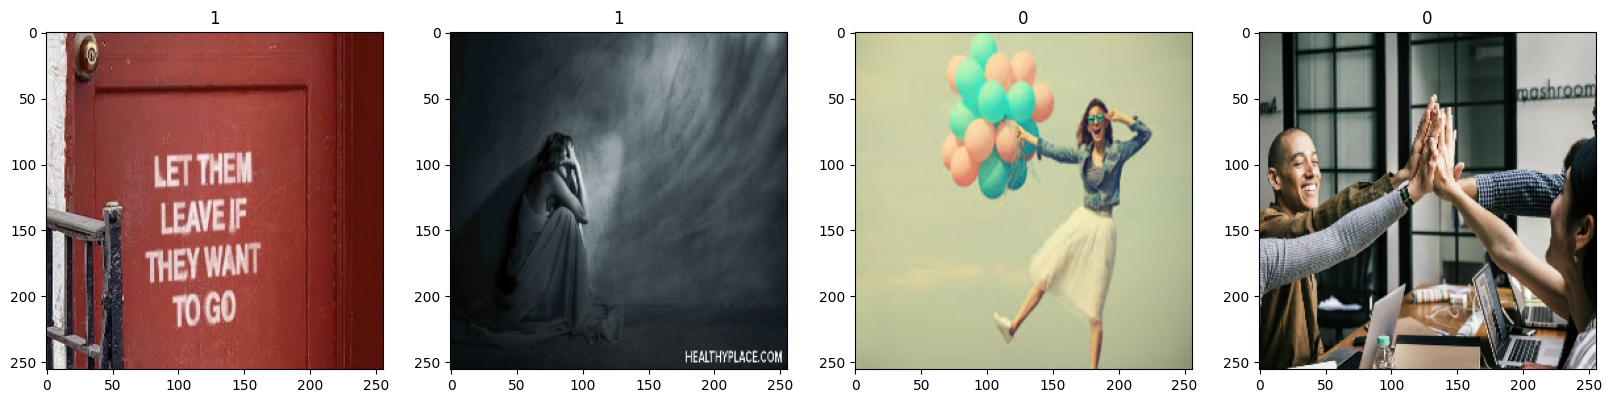

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

### Spliting the Dataset

In [16]:
len(data) #10 batches of data

10

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

##Train

In [24]:
logdir = 'logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 21s 918ms/step - loss: 1.0915 - accuracy: 0.5134 - val_loss: 0.6495 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 7s 790ms/step - loss: 0.6428 - accuracy: 0.5446 - val_loss: 0.6630 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 6s 567ms/step - loss: 0.6630 - accuracy: 0.7098 - val_loss: 0.6355 - val_accuracy: 0.6406
Epoch 4/20
7/7 [==============================] - 10s 944ms/step - loss: 0.5826 - accuracy: 0.7054 - val_loss: 0.5265 - val_accuracy: 0.7031
Epoch 5/20
7/7 [==============================] - 8s 918ms/step - loss: 0.4709 - accuracy: 0.7991 - val_loss: 0.3775 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 6s 577ms/step - loss: 0.3562 - accuracy: 0.8750 - val_loss: 0.3062 - val_accuracy: 0.8594
Epoch 7/20
7/7 [==============================] - 8s 806ms/step - loss: 0.3309 - accuracy: 0.8750 - val_loss: 0.3206 - val_accuracy: 0.8438
Epoch 8/20
7/7 [==

## Plot Performance

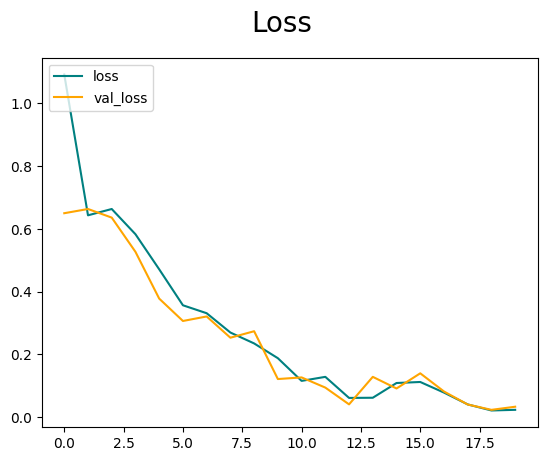

In [28]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

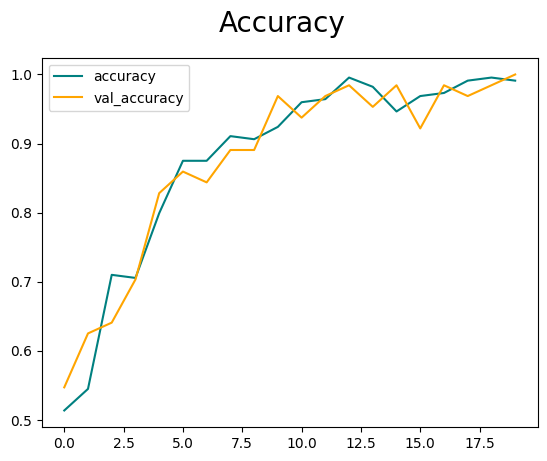

In [29]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

##Evaluation Performance

###Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 395ms/step


In [33]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


#Test

In [35]:
import cv2 as cv

In [36]:
# img = cv.imread("")
# plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
# plt.show()

In [37]:
# resize = tf.image.resize(img, (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

In [38]:
# yhat = model.predict(np.expand_dims(resize/255, 0))

In [40]:
# if yhat > 0.5:
#   print(f'Predicted Class is Sad')
# else:
#   print(f'Predicted Class is Happy')

#Save the Model

In [41]:
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join('models','happysadmodel.h5'))

In [48]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [49]:
# yhatnew = new_model.predict(np.expand_dims(resize/255,0))

In [50]:
# if yhat > 0.5:
#   print(f'Predicted Class is Sad')
# else:
#   print(f'Predicted Class is Happy')